# Solving Magic Square problems using Metaheursiticks


* It works for all positive integers
* with k of possible numbers


In [1]:
def graphicate(mejores, peores, promedio, generaciones):
    x = list(range(1, generaciones+1))
    plt.scatter(x, mejores, color='green', label='mejor', s=10)
    plt.plot(x, mejores, color='green')
    plt.scatter(x, peores, color='red', label='peor', s=10)
    plt.plot(x, peores, color='red')
    plt.scatter(x, promedio, color='blue', label='promedio', s=10)
    plt.plot(x, promedio, color='blue')
    plt.legend()
    plt.xlabel('Generations')
    plt.ylabel('Aptitud')
    plt.title("Convergence graph")
    plt.show()

In [120]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# --- GA --------------------------------------------------
# k = 3
# [1,2,3,4,5,6,7,8,9] 
# -------------
# | 1 | 2 | 3 |
# -------------
# | 4 | 5 | 6 |
# --------------
# | 7 | 8 | 9 |
# -------------

# In a magic

def init_pobaltion(populationSize, n):
    population = []
    numbers = list(range(1, n * n + 1))
    for _ in range(populationSize):
        random.shuffle(numbers)
        population.append(numbers)
        
    
    return population

def get_k(n):
    return (n*(n**2 + 1)/2)

def get_succes_sum(square, n, k):
    aptitude = 0
#     rows & columns
    i = 0
    col_aux = 0
    while i < len(square):

        row = square[i: i+n]
        value = sum(row)
        
        if value == k:
            aptitude += 1
    
        column = []
        j = col_aux
        while j < len(square):
            column.append(square[j])
            j += n
        value = sum(column)
        if value == k:
            aptitude += 1
        
        
        col_aux += 1
        i += n
    i = 0
    neg_diagonall = []
    while i < len(square):
        neg_diagonall.append(square[i])
        i += n + 1
    
    value = sum(neg_diagonall)
    if value == k:
        aptitude += 1
    

    i = 0
    pos_diagonall = []
    aux_diagonall = n - 1
    for _ in range(n):
        pos_diagonall.append(square[aux_diagonall])
        aux_diagonall += n - 1
    
    value = sum(pos_diagonall)
    if value == k:
        aptitude += 1
    
    return aptitude
    
# [1,2,3,4,5,6,7,8,9] 
def get_min_error(square, n, k):
    aptitude = 0
#     rows & columns
    i = 0
    col_aux = 0
    while i < len(square):
        row = square[i: i+n]
        value = sum(row)
        aptitude += abs(k - value)
        
        
        column = []
        j = col_aux
        while j < len(square):
            column.append(square[j])
            j += n
        value = sum(column)
        aptitude += abs(k - value)
        col_aux += 1
        i += n
#         print(row)
#         print(column)
#         print(aptitude)
#     \
    i = 0
    neg_diagonall = []
    while i < len(square):
        neg_diagonall.append(square[i])
        i += n + 1
    
    value = sum(neg_diagonall)
    aptitude += abs(k - value)
#     print(neg_diagonall)
#     print(aptitude)

#     /
# [1,2,3,4,5,6,7,8,9] 
# -------------
# | 1 | 2 | 3 |
# -------------
# | 4 | 5 | 6 |
# --------------
# | 7 | 8 | 9 |
# -------------
    
    pos_diagonall = []
    aux_diagonall = n - 1
    for _ in range(n):
        pos_diagonall.append(square[aux_diagonall])
        aux_diagonall += n - 1
        
    
#     print(pos_diagonall)

    value = sum(pos_diagonall)
    aptitude += abs(k - value)
    
    return aptitude
    

    
    
def print_magic_square(square, k):
    values = []
    i = 0
    while i < len(square):
        row = square[i: i+k]
        row2_str = "|"
        for value in row:
            row2_str += " " + str(value) + " "
            row2_str += "|"
            
        values.append(row2_str)
        i += k 

    print("\n\n")
    print("-" * len(values[0]))
    for row in values:
        print(row)
        print("-" * len(row))
    
    print("\n\n")
    

def selectParents(parents, totalPoblation, cost_func, n, k):
    # Universal Estocastica 
    ptr = random.random()  # 0 - 1
    indexes = []
    addition = 0
    
    aptitudAverage = 0 
    for parent in parents:
        aptitudAverage += cost_func(parent, n, k)
        
    aptitudAverage = aptitudAverage / totalPoblation
    
    for i in range(totalPoblation):
        ve = cost_func(parents[i], n, k) / aptitudAverage
#         print(cost_func(parents[i], n, k))
        addition += ve
        
        if ptr < addition:
#             print("SI")
            indexes.append(i)
        
        
        ptr += 1
    
    return indexes
    
def order_crossover(p1, p2):
    start = random.randint(0, len(p1) - 1)
    end = random.randint(start, len(p1))
    sub_cadena = p1[start:end]
    hijo = [0] * len(p1)
    hijo[start:end] = sub_cadena
    p2_sin_subcadena = [valor for valor in p2 if valor not in sub_cadena]
    index = 0
    for i in range(len(hijo)):
        if hijo[i] == 0:
            hijo[i] = p2_sin_subcadena[index]
            index += 1
    return hijo


def mutate_square(square, mutationRate):
    mutated_square = square.copy()
    if random.uniform(0, 1) <= mutationRate:
        for i in range(len(square)):
            if random.uniform(0,1) <= mutationRate:
                random_index = random.randint(0, len(square) - 1)
    #             Swap
                mutated_square[i], mutated_square[random_index] = mutated_square[random_index], mutated_square[i]
#     print("\nMUTACION: ")
#     print('NO' if mutated_square == square else 'YES')
#     print(mutated_square, square)
    return mutated_square

def createChildren(parents, indexedParents, crossRate):
    children = []
    j = 0
    while j < len(indexedParents) -1 and len(indexedParents) > 1:
        if random.uniform(0,1) <= crossRate:
            
            parent1 = parents[indexedParents[j]]
            parent2 = parents[indexedParents[j+1]]
            #print("padre1",p1)
            #print("padre2",p2)
            child1, child2 = order_crossover(parent1, parent2), order_crossover(parent2, parent1)
#             print("Padres:", parent1, parent2)
#             print("hijo1", child1)
#             print("hijo2", child2)
            children.append(child1)
            children.append(child2)
        j += 2
        
#     print(children)
    return children
  

# --- MAIN -------------------------------------------------------------------+

def GA_Magic_Square(cost_func,populationSize, mutationRate, crossRate, maxIterations, n):
    k = get_k(n)
    parents = init_pobaltion(populationSize, n)


    best = []
    worst = []
    average = []
    
    for i in range(maxIterations):
#         print("====================================================================")
#         print(f"============ Generacion: {i + 1}===================================")  
#         print("====================================================================")
            
        indexedParents = selectParents(parents, populationSize, cost_func, n, k)
        
#         print(indexedParents)
        
        children = createChildren(parents, indexedParents, crossRate)
      
        
        children2 = []
        
        for child in children:

            newChild = mutate_square(child, mutationRate)
            
#             print("CH2: ", newChild)
            children2.append(newChild)
#             print("CH3: ",1/costFunction(newChild))
#             print(children2)
            
        newPoblation = parents + children2
#         print(children2)
        
#         print("Nueva poblacionsl", newPoblation)

#         for square in newPoblation:
#             print(cost_func(square, n, k))

        survivals = sorted(newPoblation, key= lambda x: cost_func(x, n, k), reverse = False)
        
#         print("Nueva poblacionsl", newPoblation)
        parents = survivals[0: populationSize]
        
#         print("Ordenada de sobrevivientes: ", survivals)
#         print("ORDENADAS")
#         for square in survivals:
#             print(cost_func(square, n, k))
#         print(len(survivals), len(parents))
        
    
    
    #     Metrics
        best.append(cost_func(parents[0], n, k))
        worst.append(cost_func(parents[-1], n, k))

        prom = 0
        for parent in parents:
          prom += cost_func(parent, n, k)

        average.append(prom/len(parents))

    print('\n\n\n BEST SOLUTION:', parents[0], '\n')
    return best,worst,average, parents


In [121]:
print_magic_square([4, 9, 2, 3, 5, 7, 8, 1 ,6], 3)




-------------
| 4 | 9 | 2 |
-------------
| 3 | 5 | 7 |
-------------
| 8 | 1 | 6 |
-------------





In [122]:
get_succes_sum([4, 9, 2, 3, 5, 7, 8, 1 ,6], 3, 15)

8

In [123]:
get_min_error([5, 1, 9, 6, 7, 2, 4, 8, 3] , 3, 15)

7




 BEST SOLUTION: [9, 1, 6, 2, 5, 7, 4, 8, 3] 

PEOR:
Numero de 15's en filas:  0
Numero de fallo en 15 - linea:  21.0

Mejor:
Numero de 15's en filas:  3
Numero de fallo en 15 - linea:  6.0



-------------
| 9 | 1 | 6 |
-------------
| 2 | 5 | 7 |
-------------
| 4 | 8 | 3 |
-------------





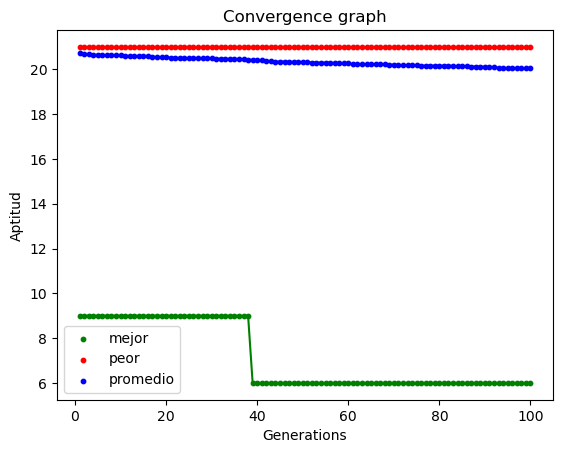

In [133]:
cost_func = get_min_error
populationSize = 1000
mutationRate = 0.3
crossRate = 0.9
maxIterations = 100
n = 3

bests,worsts,averages, parents = GA_Magic_Square(cost_func, populationSize, mutationRate, crossRate, maxIterations, n)

print("PEOR:")
print("Numero de 15's en filas: ",get_succes_sum(parents[-1], n, get_k(n)))
print("Numero de fallo en 15 - linea: ",get_min_error(parents[-1], n, get_k(n)))


print("\nMejor:")
print("Numero de 15's en filas: ",get_succes_sum(parents[0], n, get_k(n)))
print("Numero de fallo en 15 - linea: ",get_min_error(parents[0], n, get_k(n)))

print_magic_square(parents[0], n)


graphicate(bests, worsts, averages, maxIterations)